In [14]:
import sunpy
import sunpy.map
import sunkit_image
from sunkit_image import coalignment
import matplotlib.pyplot as plt

import astropy
import astropy.units as u
from astropy.coordinates import SkyCoord

In [2]:
def coalign_shift(big_map, small_map):
    yshift, xshift = coalignment._calculate_shift(big_map.data, small_map.data)
    reference_coord = big_map.pixel_to_world(xshift, yshift)
    Txshift = reference_coord.Tx - small_map.bottom_left_coord.Tx
    Tyshift = reference_coord.Ty - small_map.bottom_left_coord.Ty

    return Txshift, Tyshift
    

In [4]:
aia_171_map = sunpy.map.Map("../../src/AIA/20221022/171/lvl15/aia_lev15_171a_2022_10_22t19_20_21_34z_image_lev15.fits")

In [6]:
aia_171_map_crop_big = aia_171_map.submap(SkyCoord(-900*u.arcsec,-100*u.arcsec,frame=aia_171_map.coordinate_frame),
                                          top_right = SkyCoord(-500*u.arcsec,500*u.arcsec,frame=aia_171_map.coordinate_frame))
                                          

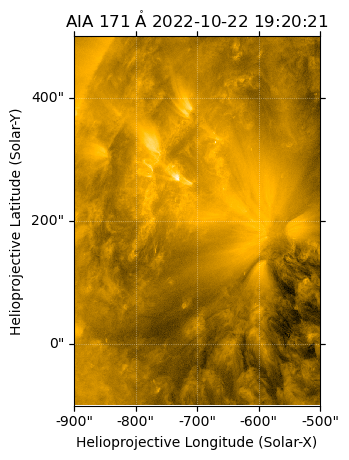

In [7]:
aia_171_map_crop_big.plot()

In [8]:
aia_171_map_crop_small = aia_171_map.submap(SkyCoord(-800*u.arcsec,-100*u.arcsec,frame=aia_171_map.coordinate_frame),
                                            top_right = SkyCoord(-600*u.arcsec,400*u.arcsec,frame=aia_171_map.coordinate_frame))

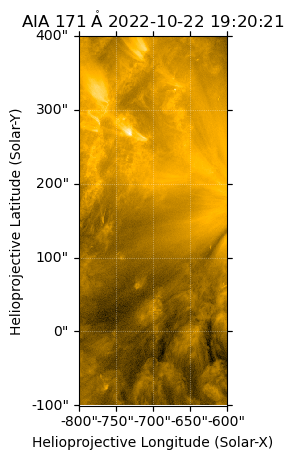

In [9]:
aia_171_map_crop_small.plot()

In [10]:
aia_171_map_crop_small_shift = aia_171_map_crop_small.shift_reference_coord(-52.5*u.arcsec, 34.2*u.arcsec)

In [11]:
coalign_shift(aia_171_map_crop_big, aia_171_map_crop_small_shift)

(<Angle 52.50027407 arcsec>, <Angle -34.19974271 arcsec>)

In [12]:
aia_171_map_crop_big_rot =  aia_171_map_crop_big.rotate(angle=30 * u.deg)

In [17]:
aia_171_map_crop_small_shift_rot = aia_171_map_crop_small_shift.rotate(angle=30 * u.deg)

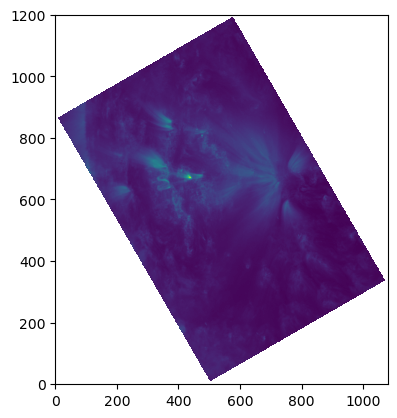

In [19]:
plt.imshow(aia_171_map_crop_big_rot.data,origin='lower')

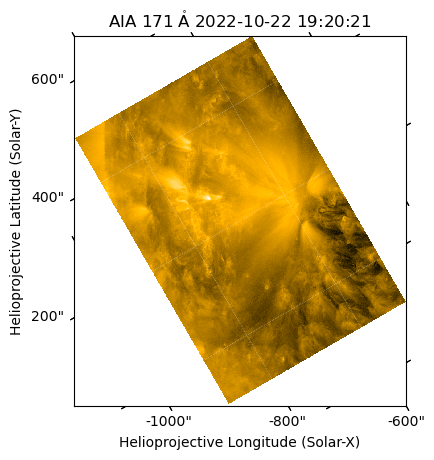

In [20]:
aia_171_map_crop_big_rot.plot()